# SEP11 "Análisis Descriptivo" COVID19 en México.

In [1]:
import numpy as np
import pandas as pd
import requests
import os 
import math
import matplotlib.pyplot as plt

#### Los datos de pueden encontrar en la pag. del gobierno federal mexicano "https://coronavirus.gob.mx/datos/#DownZCSV"
#### Las preguntas son:

1.- ¿Qué entidad tiene mejor manejo de la pandemia?

2.- ¿Qué comorbilidad es más comun en cada estado?

3.- ¿Recien nacidos confirmados covid

4.- ¿Cúal es la edad promedio de los casos de defunción?

5.- ¿Qué sexo es el que sufre mayor numero de defunciones?

6.- ¿Que edad promedio de muerte por cada sexo? 

7.- ¿Qué es la Enfermedad más riesgosa en hombres y mujeres? 

8.- ¿Que entidad presenta mayor numero de defunciones y menor numero de defunciones?

9.- ¿Que edad promedio por sexo de fallecidos por Covid-19?




In [3]:
#llamado del .csv llamdo '200910COVID19MEXICO.csv'
COVID19_Datos=pd.read_csv('200910COVID19MEXICO.csv',encoding='latin')
COVID19_Mexico=pd.DataFrame(COVID19_Datos)

COVID19_Mexico.head(3)                #muestra los (5) elementos (fila) del DataFrame sobre el COVID19 en Mexico

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-09-10,1e6e4c,2,4,25,2,25,25,11,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-09-10,113277,2,3,8,1,8,8,37,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-09-10,058534,2,4,9,1,9,9,7,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97


In [4]:
COVID19_Mexico.tail(3)          #muestra los (5) elementos ultimos del Data Frame del DataFrame sobre el COVID19 en Mexico

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
1480899,2020-09-10,06840f,2,12,15,2,15,15,110,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97
1480900,2020-09-10,17cbd6,1,12,8,2,8,8,19,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97
1480901,2020-09-10,1d5307,2,12,11,2,11,11,20,1,...,2,1,2,2,1,3,99,MÃ©xico,99,97


### Filtrado de Datos (Totales y por Enfermedad)

In [5]:
#de los datos en la tabla 'COVID19_Mexico' para responder las preguntas solo son necesarias las columnas con las enfermedades,
#estados, sexo (H-M), Fecha de defunción (para obtener el número total de casos fallecidos), Edad y resultado.
#El siguiente filtrado será sobre las filas para encontrar los casos infectados y posterirmente los fallecidos.

#FILTRADO POR COLUMNAS DE INTERES
COVID19_FCOLUMNAS=COVID19_Mexico.drop(['FECHA_ACTUALIZACION','ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM','ENTIDAD_RES', 'MUNICIPIO_RES',
                     'FECHA_SINTOMAS','INTUBADO', 'NACIONALIDAD','HABLA_LENGUA_INDIG','OTRA_COM', 'OTRO_CASO','MIGRANTE',
                    'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'], axis=1)


In [6]:
# A continuación se muestra una lita donde aparecen los estados numerados para interpretar la tabla anterios, tambien es 
#necesario mencionar que en sexo, 1=hombre y 2=mujer.
url_estados = 'http://api.imco.org.mx/wiki/index.php/Listado_de_estados_de_la_Rep%C3%BAblica_Mexicana'   #url  
html_estados = requests.get(url_estados).content               #descarga el archivo
Estados_Num = pd.read_html(html_estados, header = 0)
Estados_Num2 = Estados_Num[-1] 
Estados_N=pd.DataFrame(Estados_Num2)
Estados_N.rename(columns={'ID de estado (Dar click para ordenar)': 'ID', 
                          'Nombre del estado (Dar click para ordenar)': 'Estado'}, inplace=True)
Estados_N_R=Estados_N.drop(['Municipios del estado (Dar click para ordenar)'], axis=1)

In [7]:
#Filtrado de las Fila. El DataFrame ahora solo los casos disgnosticados como positivos de COVID19 en cada estado
COVID19_FFILAS1 = COVID19_FCOLUMNAS.drop(COVID19_FCOLUMNAS[COVID19_FCOLUMNAS['RESULTADO']==2].index)
COVID19_FFILAS2 = COVID19_FFILAS1.drop(COVID19_FFILAS1[COVID19_FFILAS1['RESULTADO']==3].index)
COVID19_FFILAS2 = COVID19_FFILAS2.drop(COVID19_FFILAS2[COVID19_FFILAS2['ENTIDAD_NAC']==99].index)

In [8]:
freq = COVID19_FFILAS2.groupby(['ENTIDAD_NAC']).count()     #cuenta el numero de veces que se repite el valor con el que
                                                            #está designado el estado, esto regresa un data frame con el num
                                                            #de columna igual al DataFrame ya filtrado lleno de las veces que 
                                                            #se repite cada valor de la entidad
freq_states=pd.DataFrame({'RESULTADO':freq['RESULTADO']})
freq_states=pd.DataFrame(freq_states.values)
freq_states.rename(columns={0: 'Total'}, inplace=True)
Estados_N_R['Contagios']=freq_states.Total
Total = Estados_N_R['Contagios'].sum()

def porcentaje(n):                                           #función para encontrar cuanto porcentaje del global de contagios
   return (n/Total)*100                                      #hay en cada estado

Estados_N_R['Porcentaje']=Estados_N_R['Contagios'].apply(porcentaje)



#filtrado ASMA
COVID19_ASMA = COVID19_FFILAS2.drop(COVID19_FFILAS2[COVID19_FFILAS2['ASMA']!=1].index)

freq_asma = COVID19_ASMA.groupby(['ENTIDAD_NAC']).count()       
freq_states=pd.DataFrame({'ASMA':freq_asma['ASMA']})
freq_asma_states=pd.DataFrame(freq_states.values)
freq_asma_states.rename(columns={0: 'Total'}, inplace=True)
Estados_N_R['Contagios_Asma']=freq_asma_states.Total
Total_asma = Estados_N_R['Contagios_Asma'].sum()



#filtrado DIABETES
COVID19_DIABETES = COVID19_FFILAS2.drop(COVID19_FFILAS2[COVID19_FFILAS2['DIABETES']!=1].index)
freq_diabetes = COVID19_DIABETES.groupby(['ENTIDAD_NAC']).count()
freq_states=pd.DataFrame({'DIABETES':freq_diabetes['DIABETES']})
freq_diabetes_states=pd.DataFrame(freq_states.values)
freq_diabetes_states.rename(columns={0: 'Total'}, inplace=True)
Estados_N_R['Contagios_Diabetes']=freq_diabetes_states.Total
Total_diabetes = Estados_N_R['Contagios_Diabetes'].sum()


#filtrado Hipertensión
COVID19_HIPER = COVID19_FFILAS2.drop(COVID19_FFILAS2[COVID19_FFILAS2['HIPERTENSION']!=1].index)
freq_hiper = COVID19_HIPER.groupby(['ENTIDAD_NAC']).count()
freq_states=pd.DataFrame({'HIPERTENSION':freq_hiper['HIPERTENSION']})
freq_hiper_states=pd.DataFrame(freq_states.values)
freq_hiper_states.rename(columns={0: 'Total'}, inplace=True)
Estados_N_R['Contagios_Hipertension']=freq_hiper_states.Total
Total_hiper = Estados_N_R['Contagios_Hipertension'].sum()


### Gráficos de contagios por estado (Totales y por enfermedad seleccionada)

La entidad con mejor manejo de la pandemia, basandonos en solo el número de infectados es: Colima
Las enfermedades más comunes que se tiene al momento de ser positivo de COVID19 por estado son: Diabetes e Hipertensión


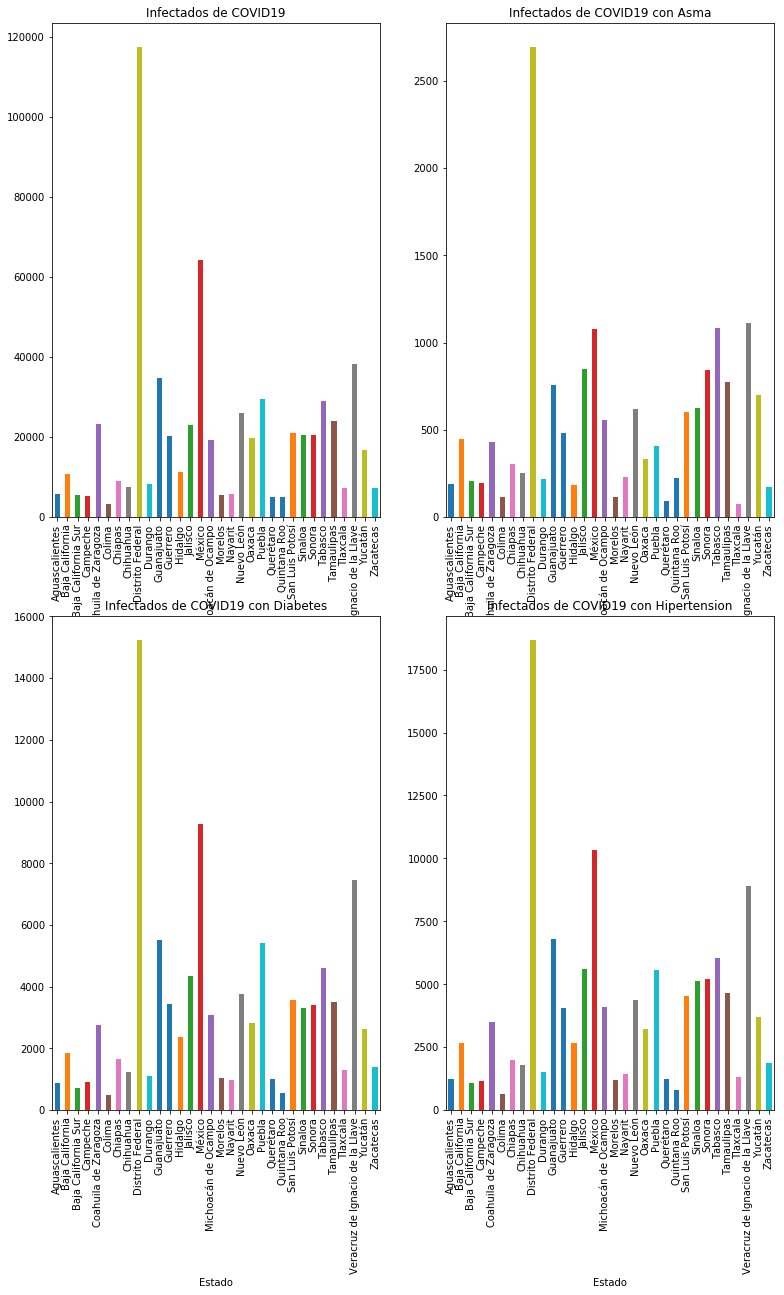

In [9]:
ts = pd.Series(Estados_N_R.Contagios, index=Estados_N_R.Estado)
ts_asma = pd.Series(Estados_N_R.Contagios_Asma, index=Estados_N_R.Estado)
ts_diabetes = pd.Series(Estados_N_R.Contagios_Diabetes, index=Estados_N_R.Estado)
ts_hiper = pd.Series(Estados_N_R.Contagios_Hipertension, index=Estados_N_R.Estado)

for i in range (len(ts.values)):
   ts[i]=Estados_N_R.Contagios.values[i]
   ts_asma[i]=Estados_N_R.Contagios_Asma.values[i]
   ts_diabetes[i]=Estados_N_R.Contagios_Diabetes.values[i]
   ts_hiper[i]=Estados_N_R.Contagios_Hipertension.values[i]

fig=plt.figure(figsize=(20,20))

plt.subplot2grid((2,3),(0,0))
ts.plot.bar()
plt.title('Infectados de COVID19')

plt.subplot2grid((2,3),(0,1))
ts_asma.plot.bar()
plt.title('Infectados de COVID19 con Asma')

plt.subplot2grid((2,3),(1,0))
ts_diabetes.plot.bar()
plt.title('Infectados de COVID19 con Diabetes')

plt.subplot2grid((2,3),(1,1))
ts_hiper.plot.bar()
plt.title('Infectados de COVID19 con Hipertension')

print('La entidad con mejor manejo de la pandemia, basandonos en solo el número de infectados es: Colima')
print('Las enfermedades más comunes que se tiene al momento de ser positivo de COVID19 por estado son: Diabetes e Hipertensión')


### Recien Nacidos con COVID19 en México

Total Recien Nacidos con COVID19 en México: 1314


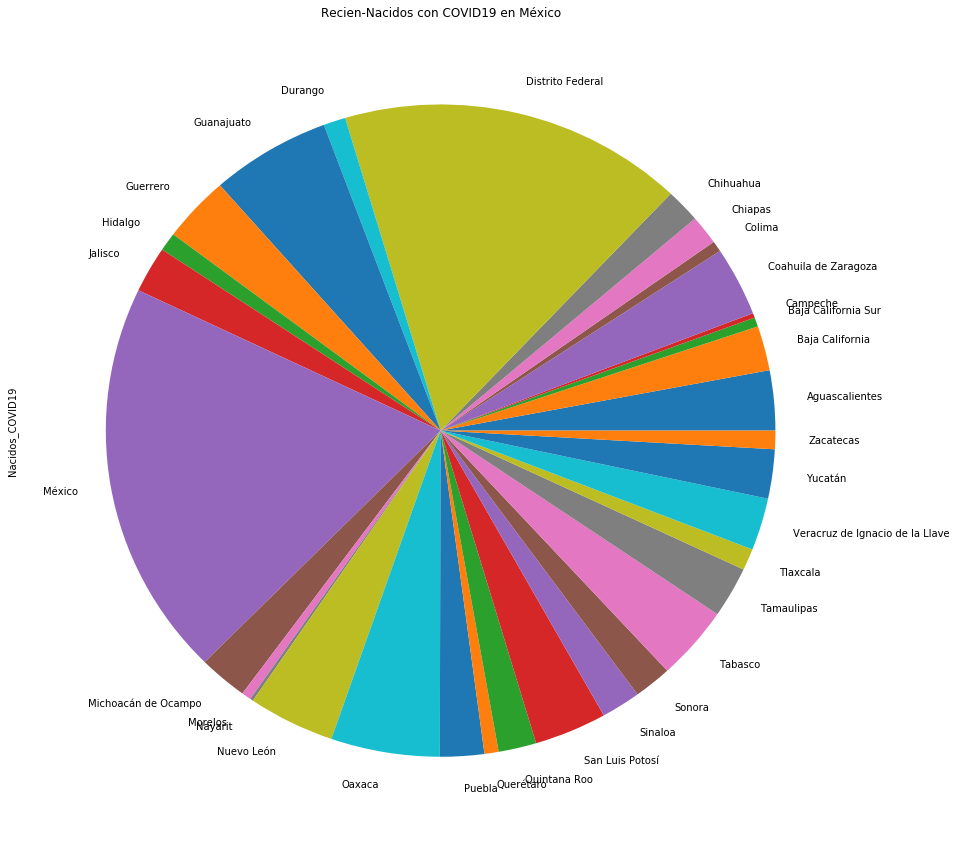

In [10]:
COVID19_RNacidos = COVID19_FFILAS2.drop(COVID19_FFILAS2[COVID19_FFILAS2['EDAD']!=0].index)
freq_edad = COVID19_RNacidos.groupby(['ENTIDAD_NAC']).count()
freq_states=pd.DataFrame({'EDAD':freq_edad['EDAD']})
freq_edad_states=pd.DataFrame(freq_states.values)
freq_edad_states.rename(columns={0: 'Total'}, inplace=True)
Estados_N_R['Nacidos_COVID19']=freq_edad_states.Total
Total_edad = Estados_N_R['Nacidos_COVID19'].sum()

ts_nacidos = pd.Series(Estados_N_R.Nacidos_COVID19, index=Estados_N_R.Estado)

for i in range (len(ts.values)):
   ts_nacidos[i]=Estados_N_R.Nacidos_COVID19.values[i]

fig=plt.figure(figsize=(15,15))
ts_nacidos.plot.pie()
plt.title('Recien-Nacidos con COVID19 en México')
print('Total Recien Nacidos con COVID19 en México:',Total_edad)



### Muertes por edad de COVID19 en mexico

Muertes por COVID19 en México: 69549
La edad promedio de muerte es: 62.2355605400509
Hombres Fallecidos: 24780
Mujeres Fallecidad: 44769
La edad promedio de muerte en hombres es: 63.26065375302663
La edad promedio de muerte en mujeres es es: 61.668163237954836


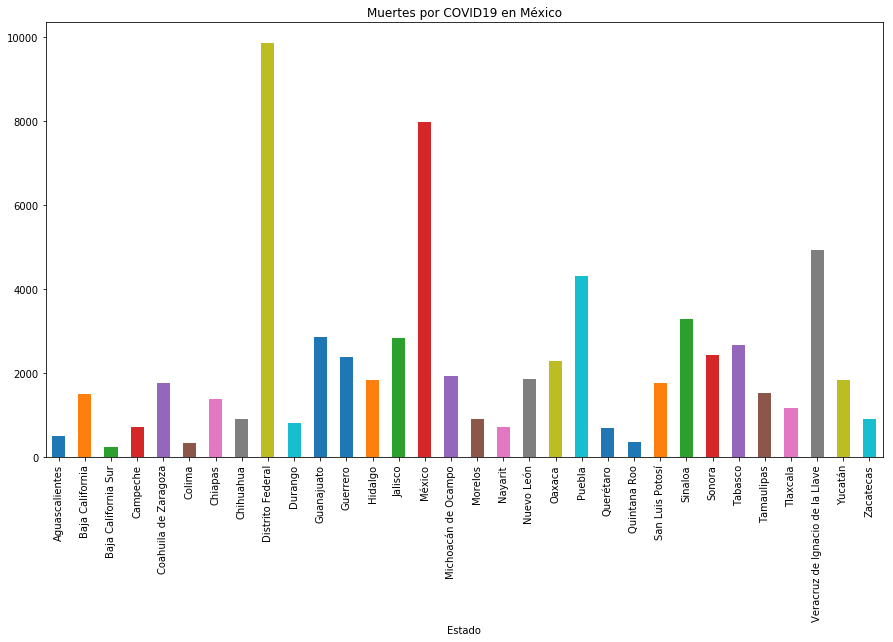

In [11]:
COVID19_DEF = COVID19_FFILAS2.drop(COVID19_FFILAS2[COVID19_FFILAS2['FECHA_DEF']=='9999-99-99'].index)
freq_def = COVID19_DEF.groupby(['ENTIDAD_NAC']).count()
freq_states=pd.DataFrame({'FECHA_DEF':freq_def['FECHA_DEF']})
freq_def_states=pd.DataFrame(freq_states.values)
freq_def_states.rename(columns={0: 'Total'}, inplace=True)
Estados_N_R['Defunciones']=freq_def_states.Total
Total_def = Estados_N_R['Defunciones'].sum()

ts_def = pd.Series(Estados_N_R.Defunciones, index=Estados_N_R.Estado)

for i in range (len(ts.values)):
   ts_def[i]=Estados_N_R.Defunciones.values[i]

fig=plt.figure(figsize=(15,8))
ts_def.plot.bar()
plt.title('Muertes por COVID19 en México')

#defunciones de hombres y mujeres 
COVID19_DEF_H = COVID19_DEF.drop(COVID19_DEF[COVID19_DEF['SEXO']!=1].index)
Def_h=len(COVID19_DEF_H)
Def_edad_h=COVID19_DEF_H['EDAD'].mean()

COVID19_DEF_M = COVID19_DEF.drop(COVID19_DEF[COVID19_DEF['SEXO']!=2].index)
Def_m=len(COVID19_DEF_M)
Def_edad_m=COVID19_DEF_M['EDAD'].mean()


print('Muertes por COVID19 en México:',Total_def)
promedio_edad_muerte=COVID19_DEF['EDAD'].mean()
print('La edad promedio de muerte es:',promedio_edad_muerte)
print('Hombres Fallecidos:',Def_h)
print('Mujeres Fallecidad:',Def_m)
print('La edad promedio de muerte en hombres es:',Def_edad_h)
print('La edad promedio de muerte en mujeres es es:',Def_edad_m)